## <font color = 'blue'><b> Import DataSet and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns' , None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

## <font color = 'blue'><b> Model Building

In [3]:
# Running the first training model
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                      984
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.55
Date:                Wed, 24 Apr 2024   Deviance:                       559.10
Time:                        15:58:17   Pearson chi2:                 2.94e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2908
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -25.1510   1.58e+04     -0.002      0.999    -3.1e+04     3.1e+04
BusinessTravel_Travel_Frequently      1.9853      0.506      3.927      0.000       0.994       2.976
BusinessTravel_Travel_Rarely          0.9920      0.467      2.126      0.034       0.077       1.907
Department_Research & Development    19.6289   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
Department_Sales                     19.2620   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
EducationField_Life Sciences         -0.7083      0.986     -0.719      0.472      -2.640       1.224
EducationField_Marketing             -0.2729      1.056     -0.258      0.796      -2.343       1.797
EducationField_Medical               -0.9618      0.987     -0.974      0.330      -2.897       0.973
EducationField_Other                 -0.7156      1.101     -0.650      0.516      -2.874       1.442
EducationField_Technical Degree       0.2516      1.003      0.251      0.802      -1.715       2.218
Gender_Male                           0.4795      0.234      2.051      0.040       0.021       0.938
JobRole_Human Resources              20.8584   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
JobRole_Laboratory Technician         1.6141      0.632      2.556      0.011       0.376       2.852
JobRole_Manager                       1.1859      1.175      1.010      0.313      -1.117       3.488
JobRole_Manufacturing Director        0.1915      0.739      0.259      0.796      -1.257       1.640
JobRole_Research Director            -0.0011      1.351     -0.001      0.999      -2.649       2.647
JobRole_Research Scientist            0.5602      0.647      0.866      0.387      -0.708       1.828
JobRole_Sales Executive               1.8634      1.558      1.196      0.232      -1.191       4.917
JobRole_Sales Representative          2.3793      1.611      1.477      0.140      -0.778       5.537
MaritalStatus_Married                 0.4125      0.332      1.242      0.214      -0.238       1.063
MaritalStatus_Single                  1.0627      0.430      2.473      0.013       0.220       1.905
Age                                  -0.2625      0.149     -1.766      0.077      -0.554       0.029
DailyRate                            -0.1465      0.112     -1.311      0.190      -0.366       0.073
DistanceFromHome                      0.4532      0.114      3.988      0.000       0.230       0.676
Education                             0.0191      0.111      0.172      0.864      -0.199       0.237
EnvironmentSatisfaction              -0.4595      0.114     -4.033      0.000      -0.683      -0.236
HourlyRate                           -0.0470      0.114     -0.412      0.680      -0.271       0.177
JobInvolvement         

In [4]:
# Feature selection using RFE

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select =  15)   # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [5]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', False, 3),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', False, 13),
 ('EducationField_Life Sciences', True, 1),
 ('EducationField_Marketing', False, 24),
 ('EducationField_Medical', True, 1),
 ('EducationField_Other', True, 1),
 ('EducationField_Technical Degree', False, 11),
 ('Gender_Male', False, 8),
 ('JobRole_Human Resources', False, 14),
 ('JobRole_Laboratory Technician', True, 1),
 ('JobRole_Manager', False, 22),
 ('JobRole_Manufacturing Director', False, 18),
 ('JobRole_Research Director', False, 23),
 ('JobRole_Research Scientist', False, 26),
 ('JobRole_Sales Executive', False, 21),
 ('JobRole_Sales Representative', False, 6),
 ('MaritalStatus_Married', False, 17),
 ('MaritalStatus_Single', True, 1),
 ('Age', False, 15),
 ('DailyRate', False, 20),
 ('DistanceFromHome', False, 7),
 ('Education', False, 28),
 ('EnvironmentSatisfaction', True, 1),
 ('HourlyRate', False, 25

In [6]:
col = X_train.columns[rfe.support_]

In [7]:
# Assesing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1013
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.21
Date:                Wed, 24 Apr 2024   Deviance:                       642.42
Time:                        15:58:18   Pearson chi2:                 2.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2309
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6017      0.257    -10.128      0.000      -3.105      -2.098
BusinessTravel_Travel_Frequently      0.9292      0.230      4.033      0.000       0.478       1.381
Department_Research & Development    -0.9015      0.261     -3.458      0.001      -1.413      -0.390
EducationField_Life Sciences         -0.6013      0.274     -2.194      0.028      -1.138      -0.064
EducationField_Medical               -0.9274      0.297     -3.127      0.002      -1.509      -0.346
EducationField_Other                 -0.5961      0.533     -1.119      0.263      -1.640       0.448
JobRole_Laboratory Technician         1.0446      0.277      3.772      0.000       0.502       1.587
MaritalStatus_Single                  1.0288      0.209      4.933      0.000       0.620       1.438
EnvironmentSatisfaction              -0.4376      0.104     -4.227      0.000      -0.640      -0.235
JobLevel                             -0.6947      0.213     -3.269      0.001      -1.111      -0.278
NumCompaniesWorked                    0.4041      0.104      3.886      0.000       0.200       0.608
OverTime                              1.7922      0.215      8.334      0.000       1.371       2.214
TotalWorkingYears                    -0.3435      0.211     -1.629      0.103      -0.757       0.070
YearsInCurrentRole                   -0.5594      0.187     -2.988      0.003      -0.926      -0.193
YearsSinceLastPromotion               0.9907      0.162      6.126      0.000       0.674       1.308
YearsWithCurrManager                 -0.4897      0.175     -2.797      0.005      -0.833      -0.147
=====================================================================================================
"""

In [8]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.164730
1    0.005765
2    0.190754
3    0.427422
4    0.120162
5    0.139271
6    0.050419
7    0.016403
8    0.358734
9    0.515009
dtype: float64

In [9]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16472969, 0.00576487, 0.19075354, 0.42742151, 0.1201618 ,
       0.13927146, 0.05041927, 0.016403  , 0.35873437, 0.51500934])

In [10]:
# Creating a DataFrame with actual Attrition Flag and the Predicted Probabilities

y_train_pred_final = pd.DataFrame({'Attrition':y_train.values.ravel(), 'Attrition_Prob':y_train_pred})

y_train_pred_final.head()

,Attrition,Attrition_Prob
0,0,0.164730
1,0,0.005765
2,0,0.190754
3,1,0.427422
4,0,0.120162


In [11]:
# Creating a column 'Predicted' as 1 if Attrition_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted
0,0,0.164730,0
1,0,0.005765,0
2,0,0.190754,0
3,1,0.427422,0
4,0,0.120162,0


## <font color = 'blue'><b> Checking VIFs

In [12]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Department_Research & Development,3.54
11,TotalWorkingYears,3.03
8,JobLevel,2.80
2,EducationField_Life Sciences,2.36
12,YearsInCurrentRole,2.29
14,YearsWithCurrManager,2.21
3,EducationField_Medical,2.15
5,JobRole_Laboratory Technician,1.56
13,YearsSinceLastPromotion,1.54
6,MaritalStatus_Single,1.41


##### The VIFs are in acceptable range

## <font color = 'blue'><b> Model Evaluation

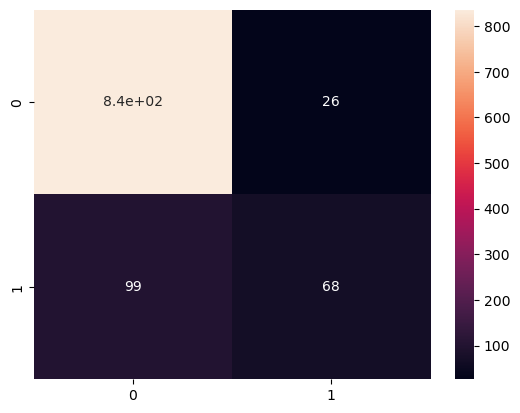

In [13]:
cm = confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted)
sns.heatmap(cm, annot=True)
plt.show()

In [14]:
print(classification_report(y_train_pred_final.Attrition, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       862
           1       0.72      0.41      0.52       167

    accuracy                           0.88      1029
   macro avg       0.81      0.69      0.73      1029
weighted avg       0.87      0.88      0.86      1029



In [15]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [16]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.40718562874251496

In [17]:
# Let us calculate specificity
TN / float(TN+FP)

0.9698375870069605

In [18]:
# Calculate false postive rate - predicting attrition when employee stayed
print(FP/ float(TN+FP))

0.030162412993039442


In [19]:
# positive predictive value 
print (TP / float(TP+FP))

0.723404255319149


In [20]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8941176470588236


## <font color = 'blue'><b> Plotting the ROC Curve
    
   

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [21]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [22]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False )

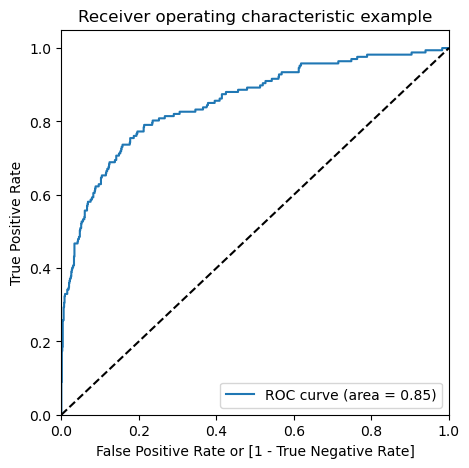

In [23]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

## <font color = 'blue'><b> Finding Optimal cut-off point

In [24]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.164730,0,1,1,0,0,0,0,0,0,0,0
1,0,0.005765,0,1,0,0,0,0,0,0,0,0,0
2,0,0.190754,0,1,1,0,0,0,0,0,0,0,0
3,1,0.427422,0,1,1,1,1,1,0,0,0,0,0
4,0,0.120162,0,1,1,0,0,0,0,0,0,0,0


In [25]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.162293  1.000000  0.000000
0.1   0.1  0.658892  0.850299  0.621810
0.2   0.2  0.803693  0.754491  0.813225
0.3   0.3  0.858115  0.628743  0.902552
0.4   0.4  0.877551  0.508982  0.948956
0.5   0.5  0.878523  0.407186  0.969838
0.6   0.6  0.881438  0.305389  0.993039
0.7   0.7  0.866861  0.197605  0.996520
0.8   0.8  0.853256  0.101796  0.998840
0.9   0.9  0.840622  0.017964  1.000000


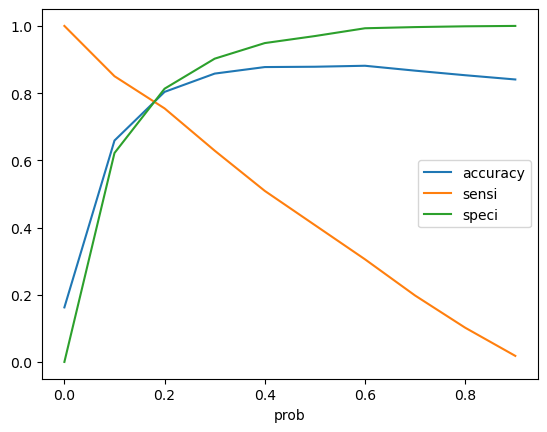

In [26]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above , 0.2 is the optimum point to be taken as cut-off probability

In [27]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.164730,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.005765,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.190754,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.427422,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.120162,0,1,1,0,0,0,0,0,0,0,0,0


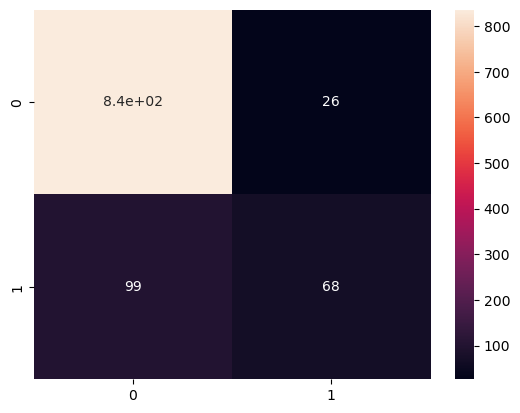

In [28]:
cm2 = confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)
sns.heatmap(cm, annot=True)
plt.show()

In [29]:
print(classification_report(y_train_pred_final.Attrition, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       862
           1       0.44      0.75      0.56       167

    accuracy                           0.80      1029
   macro avg       0.69      0.78      0.71      1029
weighted avg       0.86      0.80      0.82      1029



In [30]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

In [31]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7544910179640718

In [32]:
# Let us calculate specificity
TN / float(TN+FP)

0.8132250580046404

In [33]:
# Calculate false postive rate - predicting Attrition when employee stayed
print(FP/ float(TN+FP))

0.18677494199535963


In [34]:
# Positive predictive value 
print (TP / float(TP+FP))

0.43902439024390244


In [35]:
# Negative predictive value
print (TN / float(TN+ FN))

0.944743935309973


## <font color = 'blue'> Determining top features based on Final Model

In [36]:
pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params

const                               -2.60
BusinessTravel_Travel_Frequently     0.93
Department_Research & Development   -0.90
EducationField_Life Sciences        -0.60
EducationField_Medical              -0.93
EducationField_Other                -0.60
JobRole_Laboratory Technician        1.04
MaritalStatus_Single                 1.03
EnvironmentSatisfaction             -0.44
JobLevel                            -0.69
NumCompaniesWorked                   0.40
OverTime                             1.79
TotalWorkingYears                   -0.34
YearsInCurrentRole                  -0.56
YearsSinceLastPromotion              0.99
YearsWithCurrManager                -0.49
dtype: float64

In [37]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res.params
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature.sort_values(ascending = False)

OverTime                             100.00
JobRole_Laboratory Technician         58.29
MaritalStatus_Single                  57.41
YearsSinceLastPromotion               55.28
BusinessTravel_Travel_Frequently      51.85
NumCompaniesWorked                    22.55
TotalWorkingYears                    -19.17
EnvironmentSatisfaction              -24.42
YearsWithCurrManager                 -27.32
YearsInCurrentRole                   -31.21
EducationField_Other                 -33.26
EducationField_Life Sciences         -33.55
JobLevel                             -38.76
Department_Research & Development    -50.30
EducationField_Medical               -51.75
const                               -145.17
dtype: float64